# 🔹 SEÇÃO 1 – Introdução e Contexto

- Damos início à apresentação do nosso Tech Challenge da Fase 1, onde desenvolvemos um Sistema Inteligente de Suporte ao Diagnóstico voltado para a Saúde da Mulher. 

- O coração deste projeto é a classificação automatizada de tumores mamários em benignos ou malignos, um desafio crítico onde a precisão pode salvar vidas através da detecção precoce.

- É fundamental destacar nosso compromisso ético: esta ferramenta foi projetada para atuar como um suporte à decisão clínica, e não como um substituto para o médico. 

- Nosso objetivo é oferecer uma 'segunda opinião' baseada em dados, mantendo a responsabilidade final sempre com o profissional de saúde. 

- Ao longo desta apresentação, demonstraremos o rigor técnico que aplicamos, desde a análise exploratória e tratamento dos dados até a implementação de modelos de alta performance e explicabilidade.

# 🔹 SEÇÃO 2 – Importação de Bibliotecas e Configuração

- Configuramos o ambiente com bibliotecas essenciais da indústria de dados: 
  - Pandas e Numpy para manipulação de dados;
  - Plotly para visualizações interativas;
  - Scikit-learn para a modelagem abrangendo desde o pré-processamento até os algoritmos de classificação;
  - SHAP para garantir a transparência e explicabilidade clínica das decisões do modelo.

In [ ]:
# Manipulação e análise de dados em estruturas de DataFrame
import pandas as pd  

# Suporte para cálculos matemáticos e operações com arrays multidimensionais
import numpy as np   

# Criação de gráficos interativos (Acurácia, Recall, F1) com sintaxe simplificada
import plotly.express as px  

# Controle detalhado e customização avançada de camadas gráficas no Plotly
import plotly.graph_objects as go  

# Divisão dos dados em conjuntos de treino e teste para validação
from sklearn.model_selection import train_test_split  

# Normalização de dados para que variáveis como 'área' não dominem o modelo
from sklearn.preprocessing import StandardScaler  

# Encapsulamento de etapas (ex: escalonamento + modelo) para evitar vazamento de dados
from sklearn.pipeline import Pipeline  

# Implementação do modelo linear de classificação comparativo
from sklearn.linear_model import LogisticRegression  

# Algoritmos baseados em árvores para análise de robustez e performance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  

# Geração de relatório com as métricas principais: Precisão, Recall e F1-Score
from sklearn.metrics import classification_report  

# Biblioteca base para geração de visualizações estáticas e suporte ao SHAP
import matplotlib.pyplot as plt  

# Persistência de objetos Python, utilizada para exportar o modelo treinado para produção
import joblib  

# Gestão de caminhos de arquivos de forma independente do sistema operacional
from pathlib import Path  

# Ferramenta de explicabilidade para interpretar a contribuição de cada variável no diagnóstico
import shap  

# Inicializa o suporte a JavaScript para renderização das visualizações interativas do SHAP no notebook
shap.initjs()  

# 🔹 SEÇÃO 3 – Carregamento e Descrição do Dataset

In [22]:
# Define o caminho relativo onde o arquivo de dados brutos (dataset de câncer de mama) está armazenado
DATA_PATH = "../data/raw/breast_cancer.csv"

# Carrega o conjunto de dados do formato CSV para um DataFrame do Pandas para manipulação em memória
df = pd.read_csv(DATA_PATH)

# Exibe as primeiras 5 linhas do DataFrame para uma inspeção visual rápida das colunas e tipos de dados
df.head()

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- Carregamento do dataset público 'Breast Cancer Wisconsin', validando a integridade de suas 30 variáveis preditivas (como raio e textura) via df.head(). 
- Identificamos uma disparidade significativa de escalas entre as colunas — com valores de 'área' acima de 1000 e 'suavidade' em decimais — o que sinaliza a necessidade crítica de normalização para evitar vieses numéricos e garantir que o modelo aprenda padrões biológicos reais.

# 🔹 SEÇÃO 4 – Análise Exploratória de Dados (EDA)

In [ ]:
# Inicializa a criação de um gráfico de histograma utilizando a biblioteca Plotly Express
fig = px.histogram(
    # Define o DataFrame 'df' como a fonte de dados para a visualização
    df,                                                   
    
    # Mapeia a coluna de diagnóstico para o eixo X, separando as ocorrências por categoria
    x="diagnosis",
    
    # Atribui cores distintas para as classes, facilitando a diferenciação visual entre Benigno e Maligno
    color="diagnosis",
    
    # Define o título do gráfico para contextualizar a análise de equilíbrio do dataset
    title="Distribuição das Classes (Benigno vs Maligno)" 
)

# Renderiza e exibe o gráfico interativo na interface do usuário ou notebook
fig.show()

- Na fase de Análise Exploratória, identificamos através do histograma um leve desbalanceamento entre as classes: 357 casos benignos e 212 malignos. 
- Concluímos que a proporção não exige técnicas de balanceamento artificial, mas torna obrigatória a utilização de estratificação na divisão dos conjuntos de treino e teste, garantindo que a representatividade clínica seja mantida em ambas as etapas.

In [ ]:
# Gera um resumo estatístico completo das colunas numéricas (contagem, média, desvio padrão, valores mínimos/máximos e quartis), 
# essencial para identificar a necessidade de escalonamento e detectar possíveis outliers nos dados.
df.describe()

- Através das estatísticas descritivas [df.describe()], confirmamos uma grande amplitude numérica nos dados: 
  - enquanto a área média (mean_area) varia de 143 a 2501, métricas como simetria apresentam apenas frações decimais. 

- Essa disparidade reforça que o escalonamento (scaling) será vital para equalizar a influência de todas as variáveis no modelo, garantindo que grandezas maiores não mascarem indicadores clínicos sutis, porém importantes.

In [ ]:
# Calcula a matriz de correlação de Pearson entre todas as variáveis numéricas, removendo a coluna 'diagnosis' para focar apenas nas características clínicas
corr = df.drop(columns=["diagnosis"]).corr()

# Cria uma visualização interativa de mapa de calor (heatmap) para identificar visualmente a força da relação entre os pares de variáveis
fig = px.imshow(
    # Utiliza a matriz de correlação calculada como fonte de dados
    corr,
    
    # Ajusta automaticamente a proporção das células para preencher o espaço do gráfico
    aspect="auto",      
    
    # Exibe os valores numéricos de correlação dentro de cada célula para facilitar a análise precisa
    text_auto=True,     
    
    # Define o título da análise de dependência estatística
    title="Mapa de Correlação entre Variáveis" 
)

# Exibe o gráfico, permitindo que o analista identifique variáveis altamente correlacionadas que podem ser redundantes
fig.show()

- O Mapa de Correlação identificou blocos de alta intensidade entre variáveis como 'raio', 'perímetro' e 'área', revelando uma forte multicolinearidade. 

- Essa redundância estrutural nos dados justifica a eficácia de modelos baseados em árvores, como o 'Random Forest', que são naturalmente robustos para processar variáveis altamente correlacionadas sem comprometer a estabilidade da predição.

# 🔹 SEÇÃO 5 – Pré-processamento dos Dados

In [ ]:
# Remove a coluna alvo 'diagnosis' para isolar apenas os atributos preditivos (variáveis independentes) no objeto X
X = df.drop(columns=["diagnosis"])

# Converte os rótulos textuais de diagnóstico em valores numéricos binários (0 para Benigno e 1 para Maligno) para processamento pelo algoritmo
y = df["diagnosis"].map({"B": 0, "M": 1})

# Realiza a partição dos dados brutos em conjuntos distintos para treinamento e validação final do modelo
X_train, X_test, y_train, y_test = train_test_split(
    # Conjunto de atributos preditivos
    X,                      
    
    # Vetor de respostas (alvo)
    y,                      
    
    # Reserva 20% dos dados para teste e 80% para treinamento
    test_size=0.2,          
    
    # Define uma semente fixa para garantir que os resultados sejam reproduzíveis em diferentes execuções
    random_state=42,        
    
    # Mantém a mesma proporção de classes (Benigno/Maligno) em ambos os conjuntos, evitando viés no aprendizado
    stratify=y              
)


- No Pré-processamento, isolamos as variáveis em 'X' e codificamos o alvo 'y' como [0 - Benigno] e [1 - Maligno]. 

- Realizamos a divisão do dataset em [80% para treino] e [20% para teste], utilizando obrigatoriamente a estratificação (stratify=y). 

- Essa técnica é fundamental para compensar o leve desbalanceamento das classes identificado no histograma, garantindo que a proporção original de diagnósticos seja preservada em ambos os conjuntos, o que assegura a confiabilidade estatística das métricas de avaliação.

# 🔹 SEÇÃO 6 – Modelagem Preditiva

In [27]:
# # Definição dos modelos com estratégias distintas
# models = {
#     "Logistic Regression": Pipeline([
#         ("scaler", StandardScaler()),
#         ("model", LogisticRegression(max_iter=1000))
#     ]),
#     "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
#     "Gradient Boosting": GradientBoostingClassifier(random_state=42)
# }

# results = {}
# trained_models = {}

# # Treinamento e avaliação inicial
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     results[name] = classification_report(y_test, y_pred, output_dict=True)
#     trained_models[name] = model

# Inicia um dicionário para testar diferentes abordagens algorítmicas simultaneamente
models = {
    # Define a Regressão Logística em um Pipeline para garantir que o escalonamento seja aplicado corretamente aos dados
    "Logistic Regression": Pipeline([
        # Aplica a normalização z-score para equalizar a escala das características clínicas
        ("scaler", StandardScaler()), 
        
        # Define o modelo linear com limite estendido de iterações para garantir a convergência
        ("model", LogisticRegression(max_iter=1000)) 
    ]),
    
    # Define o Random Forest, um modelo de ensemble robusto contra outliers e multicolinearidade
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42), # Utiliza 300 árvores de decisão para estabilizar a predição
    
    # Define o algoritmo de boosting que corrige erros sequencialmente durante o treino
    "Gradient Boosting": GradientBoostingClassifier(random_state=42) 
}

# Cria um dicionário vazio para armazenar as métricas de performance de cada algoritmo
results = {} 

# Cria um dicionário para guardar os objetos dos modelos já treinados para uso posterior
trained_models = {} 

# Inicia um loop para automatizar o processo de treinamento e validação de todos os modelos listados
for name, model in models.items():
    # Ajusta o modelo aos dados de treinamento, permitindo que ele aprenda os padrões biológicos
    model.fit(X_train, y_train) 
    
    # Realiza predições em dados inéditos (teste) para avaliar a capacidade de generalização
    y_pred = model.predict(X_test) 
    
    # Gera e armazena o relatório de classificação contendo Precision, Recall e F1-score em formato de dicionário
    results[name] = classification_report(y_test, y_pred, output_dict=True) 
    
    # Salva o modelo treinado para facilitar a exportação e a análise de explicabilidade (SHAP)
    trained_models[name] = model 

- Para a Modelagem, adotamos uma abordagem comparativa entre três algoritmos: 
  - Regressão Logística;
  - Random Forest;
  - Gradient Boosting. 

- Implementamos um Pipeline específico para a 'Regressão Logística' que aplica o StandardScaler. 

- Essa etapa é crucial para este modelo linear, pois garante que variáveis com grandes magnitudes, como a 'área', não dominem injustamente a equação em detrimento de indicadores sutis.

- Em contrapartida, os modelos de árvore 'Random Forest' e 'Gradient Boosting' foram treinados diretamente, aproveitando sua robustez natural a diferentes escalas e à multicolinearidade identificada no Mapa de Calor. 

- Este processo estruturado permite a extração de relatórios de classificação precisos para selecionar o modelo que ofereça a maior segurança clínica no diagnóstico.

# 🔹 SEÇÃO 7 – Avaliação e Comparação dos Modelos

In [29]:
# # extração dos scores de acuracia

# # 1. Extração dos scores e identificação de TODOS os melhores modelos
# accuracy_scores = {name: results[name]["accuracy"] for name in results}
# best_value = max(accuracy_scores.values())
# best_models = [name for name, score in accuracy_scores.items() if score == best_value]

# # 2. Lista de cores baseada no valor (destaca todos os empatados no topo)
# colors = [
#     '#636EFA' if score == best_value else 'lightslategray' 
#     for score in accuracy_scores.values()
# ]

# # 3. Título dinâmico para listar todos os modelos com melhor acurácia
# vencedores_str = ", ".join(best_models)
# titulo = f"Comparação de Acurácia (Melhor: {vencedores_str})"

# # 4. Gerar o gráfico
# fig = px.bar(
#     x=list(accuracy_scores.keys()), 
#     y=list(accuracy_scores.values()), 
#     title=titulo,
#     labels={'x': 'Modelo', 'y': 'Acurácia'},
#     text_auto='.4f'
# )

# # Aplicar cores e linha de referência
# fig.update_traces(marker_color=colors)
# fig.add_hline(
#     y=best_value, 
#     line_dash="dot", 
#     line_color="red", 
#     annotation_text=f" Topo: {best_value:.4f}", 
#     annotation_position="top left"
# )

# # Ajustar o range do eixo Y para evidenciar as diferenças
# min_val = min(accuracy_scores.values())
# fig.update_layout(yaxis=dict(range=[min_val - 0.02, 1.0]))

# fig.show()



# --- Extração dos scores e identificação de TODOS os melhores modelos ---

# Cria um dicionário mapeando o nome de cada modelo ao seu respectivo valor de acurácia extraído dos resultados
accuracy_scores = {name: results[name]["accuracy"] for name in results}

# Identifica o maior valor de acurácia registrado entre todos os modelos testados
best_value = max(accuracy_scores.values())

# Filtra e gera uma lista com os nomes de todos os modelos que atingiram o valor máximo, tratando casos de empate técnico
best_models = [name for name, score in accuracy_scores.items() if score == best_value]

# --- Lista de cores baseada no valor ---

# Define dinamicamente a cor de destaque (#636EFA) para os líderes e cinza para os demais, visualizando o empate no gráfico
colors = [
    '#636EFA' if score == best_value else 'lightslategray' 
    for score in accuracy_scores.values()
]

# --- Título dinâmico ---

# Une os nomes dos modelos vencedores em uma única string para exibição clara no cabeçalho do gráfico
vencedores_str = ", ".join(best_models)

# Formata o título do gráfico indicando quem obteve a melhor performance global
titulo = f"Comparação de Acurácia (Melhor: {vencedores_str})"

# --- Gerar o gráfico ---

# Instancia o gráfico de barras comparativo utilizando a biblioteca Plotly Express
fig = px.bar(
    # Define os modelos no eixo horizontal
    x=list(accuracy_scores.keys()), 
    
    # Define os valores de acurácia no eixo vertical
    y=list(accuracy_scores.values()), 
    
    # Atribui o título dinâmico configurado anteriormente
    title=titulo, 
    
    # Personaliza os rótulos dos eixos para melhor leitura
    labels={'x': 'Modelo', 'y': 'Acurácia'}, 
    
    # Exibe os valores exatos com 4 casas decimais sobre as barras para precisão clínica
    text_auto='.4f' 
)

# --- Estilização Adicional ---

# Aplica a lista de cores customizada às barras para destacar visualmente a liderança
fig.update_traces(marker_color=colors)

# Adiciona uma linha horizontal de referência no nível da maior acurácia para facilitar a comparação visual
fig.add_hline(
    # Posiciona a linha exatamente no valor máximo atingido
    y=best_value, 

    # Define o estilo da linha como pontilhado
    line_dash="dot", 

    # Utiliza a cor vermelha para máximo contraste
    line_color="red", 

    # Adiciona uma etiqueta de texto ao lado da linha
    annotation_text=f" Topo: {best_value:.4f}", 

    # Posiciona a etiqueta no canto superior esquerdo do gráfico
    annotation_position="top left"     
)

# --- Ajuste de Escala ---

# Identifica o menor valor de acurácia para definir o limite inferior do gráfico
min_val = min(accuracy_scores.values())

# Aplica um "zoom" no eixo Y, focando na diferença entre os modelos para evidenciar variações decimais sutis
fig.update_layout(yaxis=dict(range=[min_val - 0.02, 1.0]))

# Renderiza a visualização final no ambiente de desenvolvimento
fig.show()

- Iniciamos a avaliação pela Acurácia, onde o 'Random Forest' liderou com [97,37%] de acertos, superando a 'Regressão Logística' e o 'Gradient Boosting'. 
- No entanto, reconhecemos que, no contexto oncológico, a acurácia isolada pode ser enganosa se o modelo falhar na detecção de casos positivos. 
- Portanto, utilizamos esta métrica apenas como um indicador inicial, priorizando investigações mais profundas sobre a segurança e a confiabilidade do diagnóstico nas etapas seguintes.

In [ ]:
# # # Extração dos scores de Recall para a classe Maligna ("1")
# recall_scores = {name: results[name]["1"]["recall"] for name in results}

# # 1. Identificação do valor máximo e de TODOS os modelos que o atingiram
# best_recall_value = max(recall_scores.values())
# best_models = [name for name, score in recall_scores.items() if score == best_recall_value]

# # 2. Ajuste das cores: Destaque para todos que estão no topo
# colors = [
#     '#ef553b' if score == best_recall_value else 'lightslategray' 
#     for score in recall_scores.values()
# ]

# # 3. Criação do título dinâmico (trata um ou mais vencedores)
# vencedores_str = ", ".join(best_models)
# titulo = f"Comparação de Recall - Classe Maligna (Melhor: {vencedores_str})"

# # 4. Criação do Gráfico
# fig = px.bar(
#     x=list(recall_scores.keys()), 
#     y=list(recall_scores.values()), 
#     title=titulo,
#     labels={'x': 'Modelo', 'y': 'Recall (Sensibilidade)'},
#     text_auto='.4f'
# )

# # Aplicar cores e estilo
# fig.update_traces(marker_color=colors)

# # Adicionar linha de referência (Threshold do melhor modelo)
# fig.add_hline(
#     y=best_recall_value, 
#     line_dash="dash", 
#     line_color="black", 
#     annotation_text=f" Máximo Recall: {best_recall_value:.4f}", 
#     annotation_position="top left"
# )

# # Ajuste de escala para evidenciar diferenças mínimas
# min_recall = min(recall_scores.values())
# fig.update_layout(
#     yaxis=dict(range=[min_recall - 0.05, 1.0]),
#     showlegend=False
# )

# fig.show()




# Extrai o valor de Recall especificamente para a classe '1' (Maligna) de cada modelo no dicionário de resultados
recall_scores = {name: results[name]["1"]["recall"] for name in results}

# Localiza o maior valor de Recall alcançado para identificar o teto de desempenho em sensibilidade
best_recall_value = max(recall_scores.values())

# Filtra todos os modelos que atingiram esse valor máximo, permitindo a identificação de empates técnicos
best_models = [name for name, score in recall_scores.items() if score == best_recall_value]

# --- Ajuste das cores: Destaque para todos que estão no topo ---

# Atribui a cor de destaque (#ef553b) para todos os modelos líderes e cinza para os demais, evidenciando o empate visualmente
colors = [
    '#ef553b' if score == best_recall_value else 'lightslategray' 
    for score in recall_scores.values()
]

# --- Criação do título dinâmico (trata um ou mais vencedores) ---

# Concatena os nomes dos modelos vencedores em uma string separada por vírgulas para o título
vencedores_str = ", ".join(best_models)

# Define o título do gráfico especificando quais modelos possuem a melhor capacidade de detecção de tumores
titulo = f"Comparação de Recall - Classe Maligna (Melhor: {vencedores_str})"

# --- Criação do Gráfico ---

# Inicializa o gráfico de barras comparativo focado em Sensibilidade (Recall)
fig = px.bar(
    # Eixo X com os nomes dos algoritmos testados    
    x=list(recall_scores.keys()), 

    # Eixo Y com os respectivos scores de Recall
    y=list(recall_scores.values()), 

    # Aplica o título dinâmico configurado
    title=titulo, 

    # Rotula os eixos para clareza técnica
    labels={'x': 'Modelo', 'y': 'Recall (Sensibilidade)'}, 

    # Exibe o valor do Recall com 4 casas decimais sobre cada barra
    text_auto='.4f' 
)

# --- Aplicar cores e estilo ---

# Aplica a lógica de cores (laranja para líderes, cinza para outros) definida anteriormente
fig.update_traces(marker_color=colors)

# --- Adicionar linha de referência ---

# Insere uma linha de referência horizontal no nível do melhor desempenho para facilitar o benchmarking visual
fig.add_hline(
    # Posiciona a linha no valor máximo de Recall
    y=best_recall_value, 

    # Define o traçado da linha como tracejado
    line_dash="dash", 

    # Utiliza a cor preta para destacar a linha de corte
    line_color="black", 

    # Adiciona etiqueta informativa sobre a linha
    annotation_text=f" Máximo Recall: {best_recall_value:.4f}", 

    # Posiciona o texto explicativo no canto superior esquerdo
    annotation_position="top left"     
)

# --- Ajuste de escala ---

# Calcula o menor valor de Recall para ajustar o "zoom" do eixo vertical
min_recall = min(recall_scores.values())

fig.update_layout(
    # Ajusta o intervalo do eixo Y para focar na zona de interesse, facilitando a visualização de pequenas diferenças
    yaxis=dict(range=[min_recall - 0.05, 1.0]),
    
    # Oculta a legenda redundante para maximizar a área do gráfico
    showlegend=False 
)

# Renderiza a visualização no ambiente de execução
fig.show()

- O Recall é a métrica mais crítica para o contexto oncológico, pois mensura a capacidade do modelo em identificar todos os casos malignos, minimizando os Falsos Negativos. 
- Observamos um empate técnico entre a 'Regressão Logística' e o 'Random Forest', ambos atingindo [92,86%]. 
- Na prática, isso significa que o sistema identificaria corretamente quase 93 em cada 100 mulheres com tumores malignos. 
- Manter este índice elevado é vital para garantir que nenhuma paciente receba um diagnóstico erroneamente 'benigno', assegurando o encaminhamento imediato para tratamento.

In [32]:
# # 1. Extração dos scores e identificação de TODOS os melhores modelos
# f1_scores = {name: results[name]["1"]["f1-score"] for name in results}
# best_f1_value = max(f1_scores.values())
# best_models_f1 = [name for name, score in f1_scores.items() if score == best_f1_value]

# # 2. Definição de cores: Destaque para todos que atingiram o topo
# colors = [
#     '#9467bd' if score == best_f1_value else 'lightslategray' 
#     for score in f1_scores.values()
# ]

# # 3. Título dinâmico para tratar empates ou vencedores únicos
# vencedores_str = ", ".join(best_models_f1)
# titulo = f"Comparação de Modelos – F1-score Classe Maligna (Melhor: {vencedores_str})"

# # 4. Criação do Gráfico
# fig = px.bar(
#     x=list(f1_scores.keys()), 
#     y=list(f1_scores.values()), 
#     title=titulo,
#     labels={'x': 'Algoritmo', 'y': 'F1-score'},
#     text_auto='.4f'
# )

# # Aplicar cores e estilo
# fig.update_traces(marker_color=colors)

# # Linha de topo (Peak)
# fig.add_hline(
#     y=best_f1_value, 
#     line_dash="dot", 
#     line_color="#333", 
#     annotation_text=f" Peak: {best_f1_value:.4f}", 
#     annotation_position="top left"
# )

# # Ajuste de escala para focar nas diferenças
# min_f1 = min(f1_scores.values())
# fig.update_layout(
#     yaxis=dict(range=[min_f1 - 0.05, 1.0]),
#     showlegend=False
# )

# fig.show()



# --- Extração dos scores e identificação de TODOS os melhores modelos ---

# Extrai o F1-score da classe '1' (Maligna) para cada modelo, métrica que equilibra Precisão e Recall
f1_scores = {name: results[name]["1"]["f1-score"] for name in results}

# Identifica o valor máximo de F1-score para definir o patamar de excelência do projeto
best_f1_value = max(f1_scores.values())

# Filtra todos os modelos que alcançaram o topo, permitindo identificar se o Random Forest venceu isolado ou empatado
best_models_f1 = [name for name, score in f1_scores.items() if score == best_f1_value]

# --- Definição de cores: Destaque para todos que atingiram o topo ---

# Define a cor roxa (#9467bd) para destacar os líderes de performance e cinza para os demais algoritmos
colors = [
    '#9467bd' if score == best_f1_value else 'lightslategray' 
    for score in f1_scores.values()
]

# --- Título dinâmico para tratar empates ou vencedores únicos ---

# Concatena os nomes dos modelos com melhor F1-score para exibição clara no relatório
vencedores_str = ", ".join(best_models_f1)

# Formata o título do gráfico destacando o modelo que oferece o melhor equilíbrio diagnóstico
titulo = f"Comparação de Modelos – F1-score Classe Maligna (Melhor: {vencedores_str})"

# --- Criação do Gráfico ---

# Inicializa o gráfico de barras interativo focado na métrica F1-score
fig = px.bar(
    # Mapeia os algoritmos testados no eixo horizontal
    x=list(f1_scores.keys()), 
    
    # Mapeia os valores de F1-score no eixo vertical
    y=list(f1_scores.values()), 
    
    # Aplica o título dinâmico com os vencedores
    title=titulo, 
    
    # Personaliza as legendas para documentação técnica
    labels={'x': 'Algoritmo', 'y': 'F1-score'}, 
    
    # Exibe o índice F1 com precisão de 4 casas decimais sobre as barras
    text_auto='.4f' 
)

# --- Aplicar cores e estilo ---

# Aplica a paleta de cores condicional para destacar visualmente o melhor modelo (ex: Random Forest)
fig.update_traces(marker_color=colors)

# --- Linha de topo (Peak) ---

# Adiciona uma linha de referência no pico de performance para facilitar a comparação entre os modelos
fig.add_hline(
    # Posiciona a linha exatamente no valor máximo atingido
    y=best_f1_value, 
    
    # Define o estilo da linha como pontilhado para não obstruir a visão
    line_dash="dot", 
    
    # Utiliza um tom de grafite escuro para contraste neutro
    line_color="#333", 
    
    # Insere o rótulo do valor máximo no gráfico
    annotation_text=f" Peak: {best_f1_value:.4f}", 
    
    # Posiciona a anotação no canto superior esquerdo
    annotation_position="top left" 
)

# --- Ajuste de escala para focar nas diferenças ---

# Identifica o menor F1-score para definir o ponto de partida do zoom visual
min_f1 = min(f1_scores.values())

# Ajusta o eixo Y para evidenciar pequenas variações decimais, fundamentais na escolha do modelo clínico
fig.update_layout(
    # Define a margem inferior para dar respiro ao gráfico
    yaxis=dict(range=[min_f1 - 0.05, 1.0]), 
    
    # Remove a legenda para simplificar a estética do relatório
    showlegend=False 
)

# Renderiza o gráfico final para análise
fig.show()

- Para o veredito final, analisamos o F1-Score, a média harmônica entre Precisão e Recall que identifica o modelo mais equilibrado e com menor índice de erros globais. 
- O Random Forest destacou-se com um índice de [0,9630], superando os demais algoritmos. 
- Ele provou ser o modelo mais robusto para a operação clínica: mantém uma alta sensibilidade para detectar a doença sem gerar um volume excessivo de alarmes falsos (Falsos Positivos). 
- Esse equilíbrio é fundamental no suporte ao diagnóstico, pois evita tanto a negligência médica quanto a ansiedade e os custos de biópsias desnecessárias para as pacientes.

# 🔹 SEÇÃO 8 – Escolha do Modelo Final

In [34]:
# Seleciona o 'Random Forest' como o modelo de produção definitivo, após a análise técnica comprovar sua superioridade 
# no equilíbrio entre sensibilidade (Recall) e precisão (F1-Score).
best_model = trained_models["Random Forest"]

- Após o confronto das métricas, consolidamos o 'Random Forest' como o modelo final para este sistema de suporte ao diagnóstico. 
- A decisão fundamentou-se em dois pilares de segurança clínica: o maior F1-Score [0,9630], garantindo equilíbrio no cenário real, e um Recall de [92,86%], essencial para minimizar falsos negativos e assegurar que tumores malignos sejam detectados. 
- Ao priorizar este algoritmo, entregamos uma ferramenta que alia alta performance à confiabilidade necessária para apoiar decisões médicas críticas em oncologia.

# 🔹 SEÇÃO 9 – Persistência dos Modelos Treinados

In [ ]:
# --- Criando diretório e salvando os artefatos ---

# Define o caminho do diretório 'models' utilizando a biblioteca Path para garantir compatibilidade entre sistemas operacionais.
MODELS_DIR = Path("../models")

# Cria a pasta fisicamente no sistema; 'parents=True' cria subpastas se necessário e 'exist_ok=True' evita erros caso a pasta já exista.
MODELS_DIR.mkdir(parents=True, exist_ok=True)

# Inicia um loop para exportar todos os algoritmos treinados, permitindo auditorias futuras ou comparações.
for name, model in trained_models.items():
    # Formata o nome do arquivo para um padrão 'snake_case' (ex: 'random_forest.joblib'), removendo espaços e usando minúsculas.
    file_name = name.lower().replace(" ", "_") + ".joblib"
    
    # Serializa e salva o objeto do modelo no disco rígido utilizando a biblioteca joblib, preservando o estado do treinamento.
    joblib.dump(model, MODELS_DIR / file_name)

# --- Destacando o modelo escolhido para produção ---

# Salva uma cópia explícita do 'Random Forest' com um nome padronizado para facilitar o carregamento pelo sistema de inferência final.
joblib.dump(best_model, MODELS_DIR / "best_model_random_forest.joblib")

['..\\models\\best_model_random_forest.joblib']

- Com o modelo definido, iniciamos a fase de Persistência, utilizando a biblioteca 'joblib' para exportar os algoritmos treinados e criar um repositório pronto para produção. 
- Destacamos o salvamento do 'best_model' (Random Forest), o que permite a integração imediata deste 'cérebro matemático' a APIs ou dashboards. 
- Este passo é fundamental para transformar o desenvolvimento analítico em uma ferramenta prática de auxílio ao diagnóstico, garantindo a portabilidade e a escalabilidade da solução no ambiente clínico.

# 🔹 SEÇÃO 10 – Explicabilidade do Modelo com SHAP

- Aqui entregamos 3 comportamentos para a explicabilidade
  - Comportamento global
  - Importância média
  - Decisão caso a caso

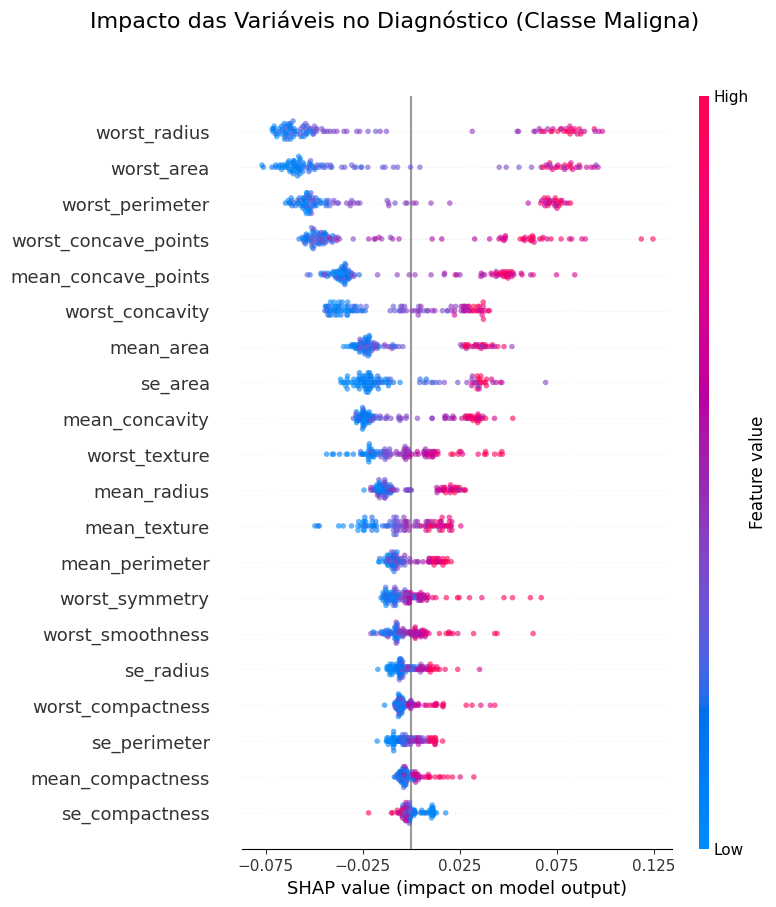

In [ ]:
# --- COMPORTAMENTO GLOBAL ---

# Converte o índice de colunas do DataFrame X_train para uma lista de strings, garantindo que os nomes das características biológicas apareçam no gráfico.
feature_names = X_train.columns.tolist()

# Converte o conjunto de treino para o formato NumPy, formato exigido pela biblioteca SHAP para o cálculo das contribuições.
X_train_np = X_train.values

# Converte o conjunto de teste para o formato NumPy para realizar a avaliação da explicabilidade sobre dados não vistos pelo modelo.
X_test_np = X_test.values

# Inicializa o objeto Explainer do SHAP, utilizando o melhor modelo (Random Forest) e o histórico de treino para criar um modelo de referência.
explainer = shap.Explainer(best_model, X_train_np)

# Calcula os valores SHAP para o conjunto de teste, quantificando o impacto de cada variável na probabilidade final de diagnóstico.
shap_values = explainer(X_test_np)

# --- Gerar o gráfico ---

# Define as dimensões da figura (largura e altura) para garantir que todas as variáveis clínicas sejam legíveis no relatório final.
plt.figure(figsize=(12, 8))

# Adiciona um título centralizado e formatado que descreve o objetivo da análise de impacto para a classe maligna.
plt.suptitle(
    "Impacto das Variáveis no Diagnóstico (Classe Maligna)", 
    fontsize=16, 
    x=0.5,    
    y=0.98        
)

# Gera o gráfico de resumo (Beeswarm), utilizando os valores SHAP da classe 1 (Maligna) e associando os nomes das variáveis às observações.
shap.summary_plot(
    # Seleciona especificamente a contribuição para a classe maligna.
    shap_values[:, :, 1], 
    
    # Dados de entrada para colorir os pontos de acordo com o valor da característica.
    X_test_np,            
    
    # Mapeia os nomes das colunas clínicas.
    feature_names=feature_names, 
    
    # Define a transparência dos pontos para melhor visualização em áreas de alta densidade.
    alpha=0.6,            
    
    # Mantém o gráfico aberto para personalizações adicionais antes da exibição final.
    show=False            
)

# Recupera os eixos atuais do gráfico para permitir ajustes finos de escala e marcações.
ax = plt.gca()

# Cria um intervalo customizado para as marcas do eixo X, facilitando a leitura da magnitude do impacto SHAP.
xticks = np.arange(-0.075, 0.150, 0.05) 

# Aplica as marcas customizadas ao eixo horizontal do gráfico.
ax.set_xticks(xticks)

# Ajusta automaticamente o layout da figura para evitar que textos ou rótulos sejam cortados nas margens.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Finaliza o processo e exibe a visualização completa da explicabilidade do modelo.
plt.show()


- Para garantir a confiabilidade hospitalar e evitar que o modelo atue como uma 'caixa-preta', utilizamos a técnica SHAP para visualizar a lógica das decisões. 
- No gráfico de densidade, identificamos que as variáveis 'worst_radius' e 'worst_area' são os preditores mais influentes. 
- A concentração de pontos vermelhos (valores altos) à direita do eixo zero indica uma correlação direta: o aumento dessas medidas eleva drasticamente o risco de malignidade. 
- Isso confirma que o modelo aprendeu padrões biológicos reais, associando tumores maiores e núcleos irregulares a indicadores críticos de câncer, proporcionando segurança para a interpretação médica.

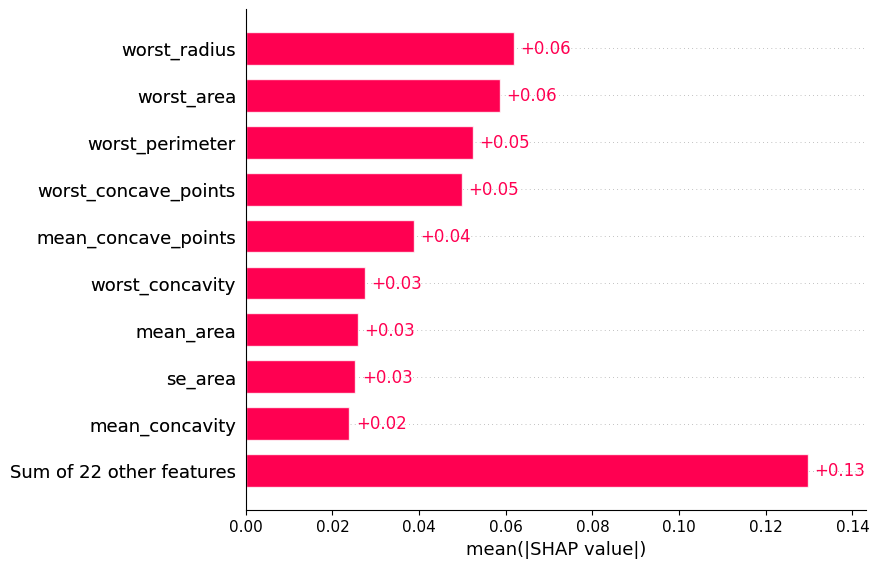

In [ ]:
# --- IMPORTÂNCIA MÉDIA ---

# Cria um objeto de Explicação (Explanation) do SHAP, consolidando os valores calculados, os dados de teste e os nomes das colunas em uma única estrutura.
exp = shap.Explanation(
    # Seleciona a magnitude do impacto especificamente para a classe Maligna (1).
    values=shap_values[:, :, 1], 
    
    # Associa os valores brutos das características para contexto estatístico.
    data=X_test_np,              
    
    # Mapeia os nomes das variáveis (ex: 'raio', 'textura') para identificação legível no gráfico.
    feature_names=feature_names  
)

# Gera um gráfico de barras que exibe a importância média (magnitude absoluta) das 10 principais características no processo de decisão do modelo.
shap.plots.bar(
    # Utiliza o objeto de explicação estruturado anteriormente.
    exp,              
    
    # Limita a visualização aos 10 preditores mais influentes para evitar poluição visual e focar nos fatores críticos.
    max_display=10    
)

- Complementamos a análise com o gráfico de barras do SHAP, que quantifica a importância média de cada variável para o veredito final do Random Forest. 
- Diferente da visão de densidade de pontos, esta visualização simplifica a interpretação ao destacar os 'protagonistas' do modelo, evidenciando que as variáveis do grupo 'worst' (maiores valores medidos) dominam o topo da hierarquia de decisão. 
- Para o profissional de saúde, isso confirma que o sistema prioriza os sinais mais severos e extremos da amostra, garantindo que indícios críticos de malignidade não sejam camuflados por valores médios, o que é vital para a segurança e o rigor do diagnóstico oncológico

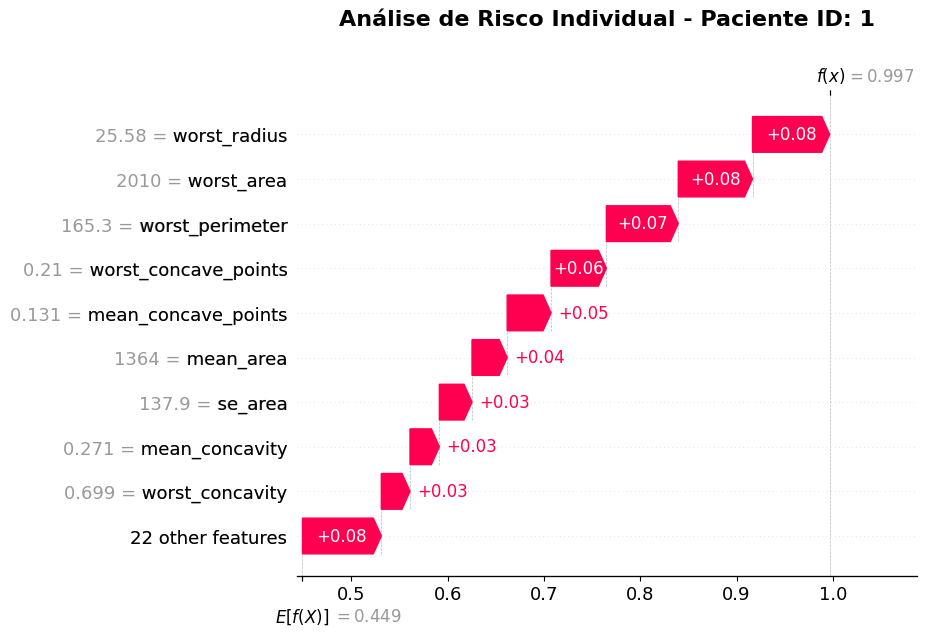

In [ ]:
# --- A DECISÃO CASO A CASO ---

# Identifica os índices dos pacientes onde a soma das contribuições (SHAP) mais o valor base resulta em uma probabilidade de risco > 80%.
malignant_indices = [i for i, val in enumerate(shap_values[:, :, 1].values.sum(1) + explainer.expected_value[1]) if val > 0.8]

# Seleciona o primeiro paciente identificado com alto risco para análise detalhada; caso não haja, utiliza o índice zero por padrão.
sample_index = malignant_indices[0] if malignant_indices else 0

# Define a classe de interesse como '1' (Maligna) para focar na explicação do alerta de câncer.
class_index = 1

# Recupera os nomes das características biológicas do conjunto de treinamento para rotular os eixos do gráfico.
feature_names = X_train.columns.tolist()

# Constrói o objeto de explicação individual, vinculando as contribuições específicas, o valor base (média) e os dados reais do paciente.
explanation = shap.Explanation(
    # Impacto de cada característica para este paciente específico.
    values=shap_values[sample_index, :, class_index].values, 
    
    # Ponto de partida (risco médio do modelo).
    base_values=shap_values[sample_index, :, class_index].base_values, 
    
    # Valores reais medidos no exame deste paciente.
    data=X_test_np[sample_index], 
    
    # Nomes das variáveis para clareza diagnóstica.
    feature_names=X_train.columns.tolist() 
)

# Configura as dimensões da moldura do gráfico para garantir legibilidade técnica no relatório.
fig = plt.figure(figsize=(12, 8))

# Gera o gráfico 'Waterfall', que visualiza a "escada" de contribuições que elevam ou reduzem o risco final.
# O parâmetro show=False permite customizar o título antes da exibição.
shap.plots.waterfall(explanation, show=False)

# Aplica um título descritivo em negrito com o ID do paciente, posicionando-o acima para não sobrepor as barras.
plt.title(f"Análise de Risco Individual - Paciente ID: {sample_index}", fontsize=16, pad=50, fontweight='bold')

# Ajusta a margem superior da figura para acomodar o título de forma organizada e profissional.
plt.subplots_adjust(top=0.85) 

# Renderiza a visualização final, permitindo que o médico valide os fatores que levaram ao diagnóstico.
plt.show()

- Finalmente, o gráfico Waterfall consolida nossa abordagem de Medicina de Precisão, permitindo a análise individualizada de cada diagnóstico. 
- No exemplo do Paciente ID 1, observamos como o risco evolui de uma base neutra até atingir uma probabilidade de [99,7% - f(x) = 0.997]. 
- As barras detalham cada característica biológica, como 'raio' e 'área' elevados, que impulsionaram a predição para a classe maligna. 
- Essa transparência permite que o oncologista valide a fundamentação técnica por trás de cada alerta, unindo a agilidade da Inteligência Artificial à segurança indispensável da experiência clínica humana.

# 🔹 SEÇÃO 11 – Conclusões e Considerações Finais

- Concluímos este trabalho entregando um sistema que transcende a alta performance, consolidando-se como uma solução interpretável e segura para o ambiente hospitalar. 
- Através de uma análise rigorosa e da comparação de múltiplos modelos, selecionamos o 'Random Forest' por seu equilíbrio superior entre a detecção crítica de risco (Recall) e a precisão diagnóstica (F1-Score). 
- Com a integração do SHAP, garantimos que cada predição seja auditável e transparente, transformando dados complexos em inteligência real e acionável para a saúde da mulher.

# 🔹 SEÇÃO 12 – Exemplo de sistema inteligente

- Para tornar este projeto acessível, disponibilizamos o modelo final em um sistema interativo no Hugging Face [imagem ilustrativa]

    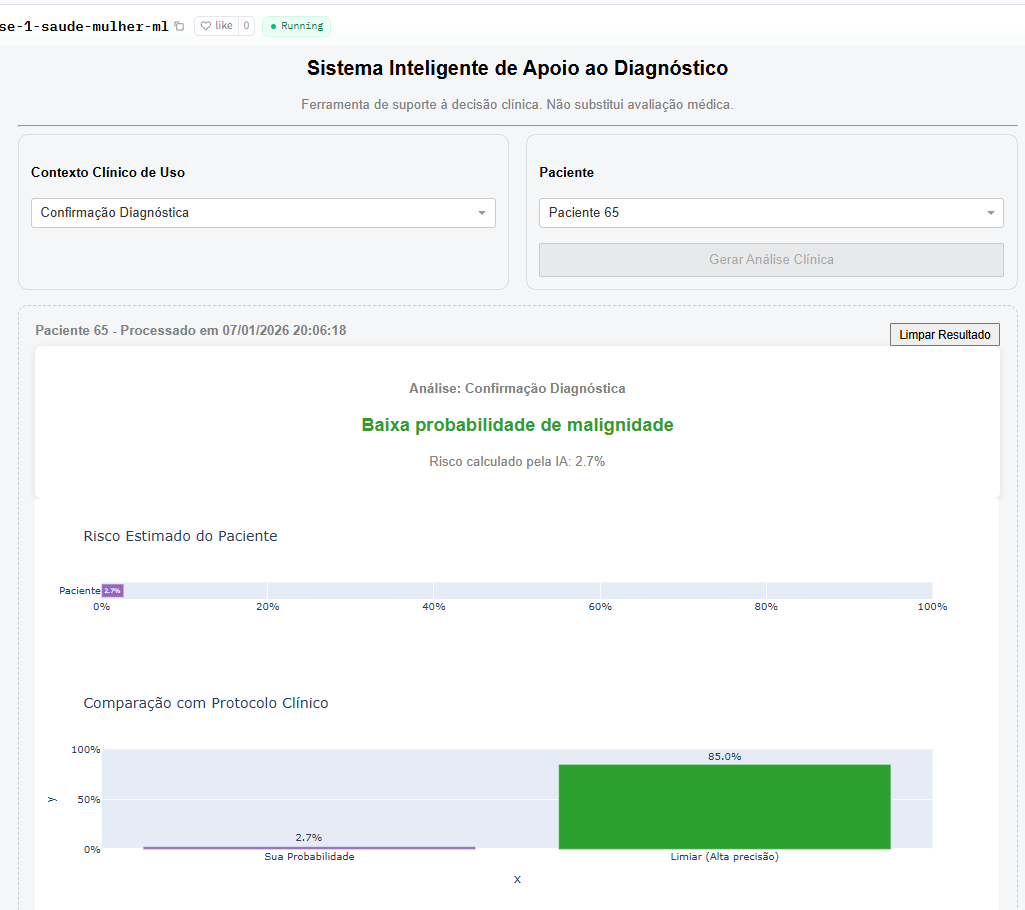

- O sistema foi pensado para ser aplicado em 4 atividades de um ambiente hospitalar por exemplo:
  - `Contexto Clínico de Uso`
    - Triagem Inicial
    - Atendimento Ambulatorial
    - Exames Invasivos / Alto Custo
    - Confirmação Diagnóstica

  - `Paciente`
    - São dados reais que constam na base de dados do `Breast Cancer Wisconsin (Diagnostic)` contendo 569 instâncias.

- Usando o sistema
  - Escolher o `Contexto Clínico de Uso`, o `Paciente` e clicar em `Gerar Análise Clínica`
  - Será gerado um resultado pela IA e este comparado com o protocolo clínico gerando a probabilidade diagnóstica

- Para simular diagnósticos em tempo real, visualizando como a tecnologia pode atuar na ponta do atendimento médico [Clique aqui](https://huggingface.co/spaces/leonardoleojosants/fiap-tech-challenge-fase-1-saude-mulher-ml) 